# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

# **Marks: 30**

Welcome to the project on Unsupervised Learning. We will be using **Credit Card Customer Data** for this project.

--------------------------------
## **Context**
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers.

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [4]:
# Importing all the necessary packages

import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

from sklearn.decomposition import PCA

from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [5]:
#Load data file per instruction.

data = pd.read_excel('Credit+Card+Customer+Data.xlsx')

### **Data Overview**

- Observations
- Sanity checks




In [6]:
# Verify the data load and return the first 20 rows.

data = pd.read_excel('Credit+Card+Customer+Data.xlsx')
data.head(20)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


## **Data Preprocessing and Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.
- Check and drop the duplicate customer keys
- Drop the variables that are not required for the analysis
- Check duplicate rows and remove them.


**Questions:**

1. How does the distribution and outliers look for each variable in the data?
2. How are the variables correlated with each other?

#### **Check the summary Statistics**

Dataframe:
     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10                 9  
2   

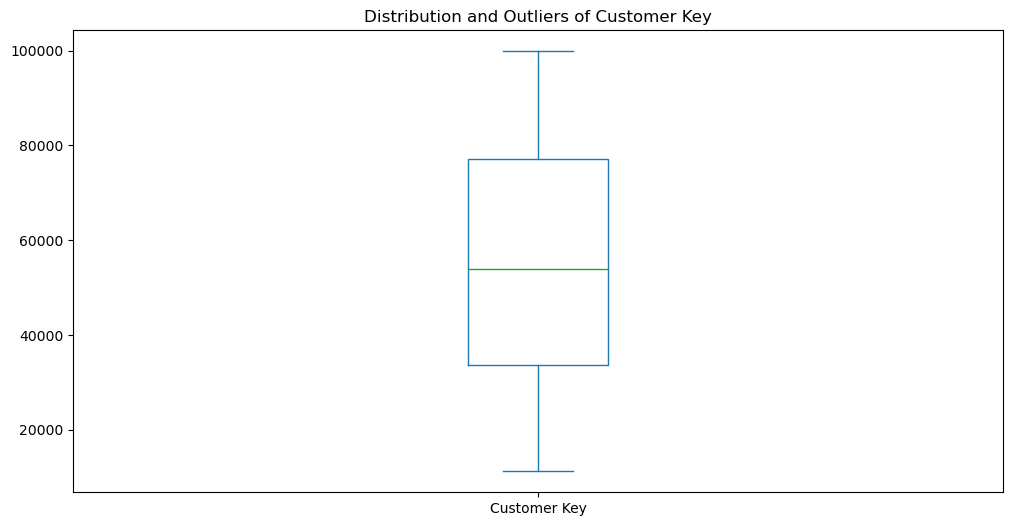

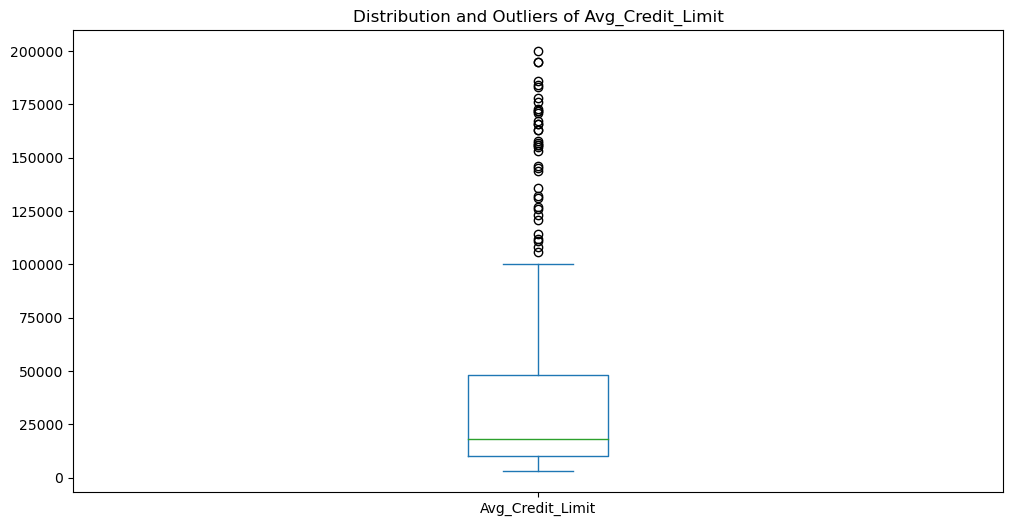

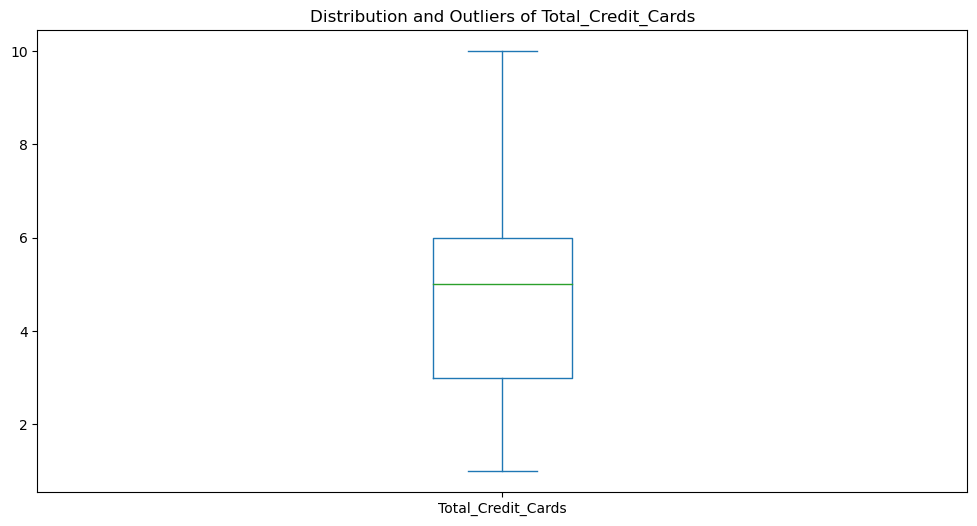

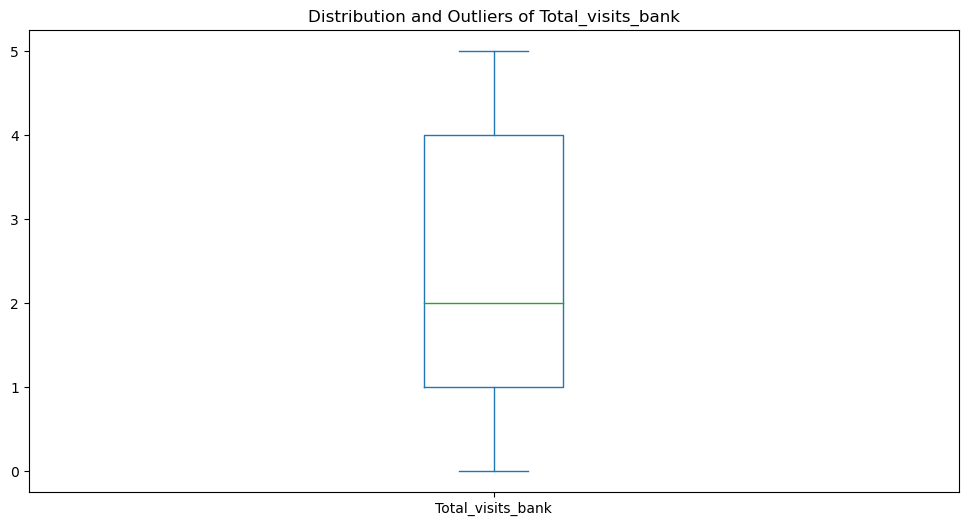

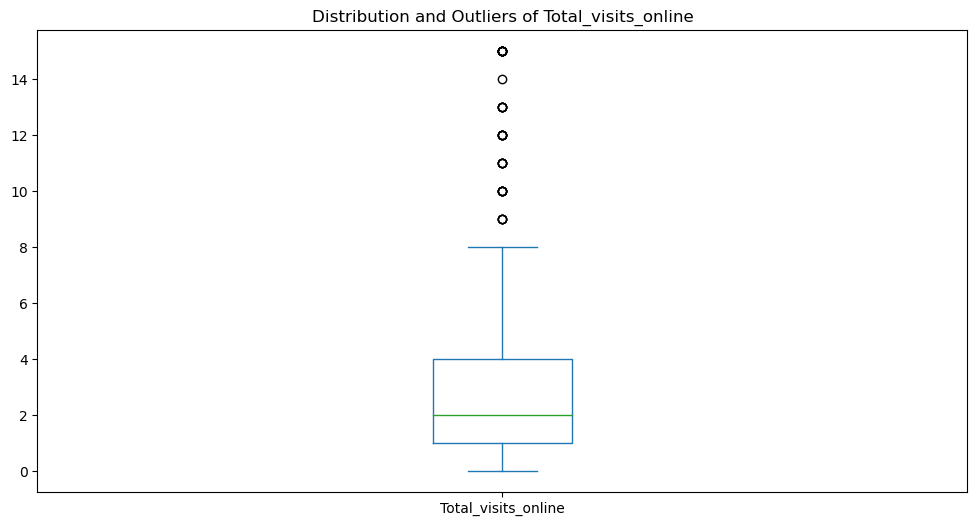

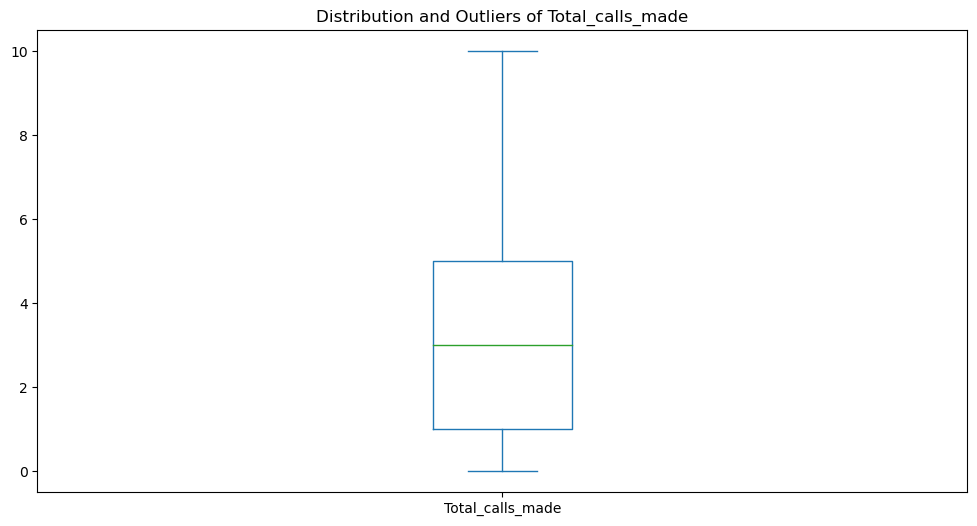

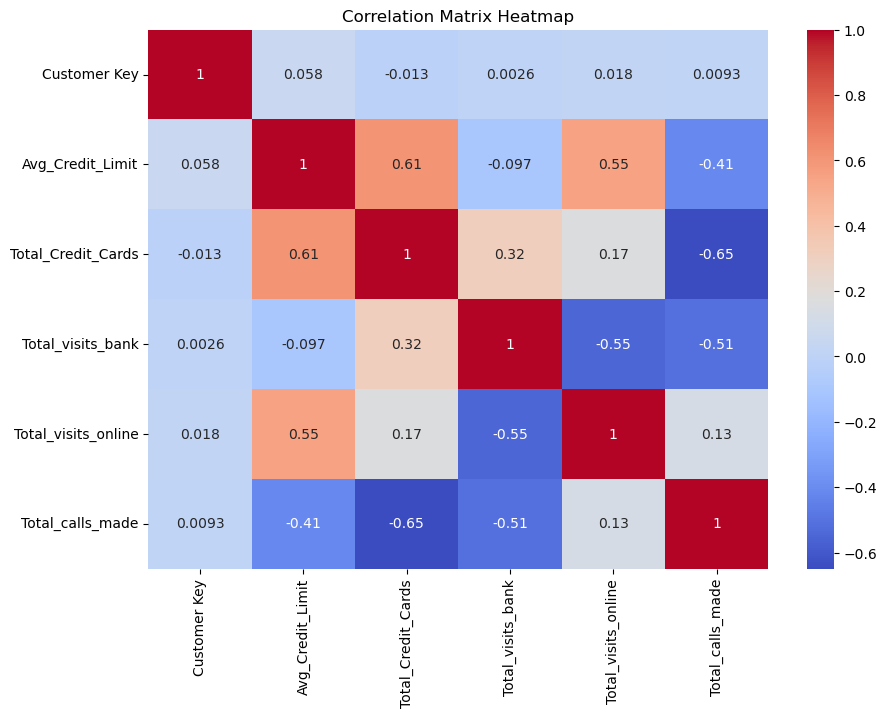

In [7]:
import pandas as pd


# Define the data

# CN: Commented out the lines below since they are overwriting the data variable holding the excel workbook data
# CN: The other thing I did was delete the first page of your excel sheet. When you read the workbook in using the
#     pd.read_excel() method, you either need to have just one sheet with your data or you need to specify the sheet name.
#     In your case you had a sheet called Macro1 and Sheet1. The method was attempting to read data off Macro1 and was
#     coming up blank. Macro1 has been deleted, and now the data loads. Other thing is that if you run this cell with the
#     data dict below uncommented, and then recomment the dict and run it again, it will still use the dict from memory.
#     To return to using the xlsx data you need to re-run the cell above where you load the xlsx as the data variable.

""""data = {
    'Sl_No': [1, 2, 3, 4, 5],
    'Customer Key': [87073, 38414, 17341, 40496, 47437],
    'Avg_Credit_Limit': [100000, 50000, 50000, 30000, 100000],
    'Total_Credit_Cards': [2, 3, 7, 5, 6],
    'Total_visits_bank': [1, 0, 1, 1, 0],
    'Total_visits_online': [1, 10, 3, 1, 12],
    'Total_calls_made': [0, 9, 4, 4, 3]
}
"""

# Create a DataFrame
df = pd.DataFrame(data)

print("Dataframe:")
print(data)
# Print the column labels
print(df.columns)

# Check for duplicate data in each column
for column in df.columns:
    print(f"{column} has {df.duplicated(subset=column).sum()} duplicate values")

    # Drop duplicate customer keys and rows
df.drop_duplicates(subset='Customer Key', keep='first', inplace=True)
df.drop_duplicates(inplace=True)

# Drop variables not required for analysis (ruling that 'Sl_No' is not required)
df.drop(columns=['Sl_No'], inplace=True)
# Check distribution and outliers for each variable in the data
for column in df.columns:
    plt.figure(figsize=(12, 6))
    df[column].plot(kind='box')
    plt.title(f'Distribution and Outliers of {column}')
    plt.show()

# Check how variables are correlated with each other
correlation_matrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



Observations:

Unique Identifiers: Both Sl_No and Customer Key have no duplicate values. The rows are unique to each customer.

Duplicate Value Columns: Avg. Credit Limit, Total Visits Bank, Total Visits Online, and Total Calls Made, contain duplicate values. So  different customers can have the same credit limit, make the same number of visits to the bank or online, or make the same number of calls.

The data appears to be clean as there are no duplicate customers (Customer Key) or rows in the dataset.

Potential Grouping: The presence of duplicate values in columns listed above could suggest potential groupings among the customers.

Example 1:  customers with the same average credit limit might represent a particular segment.

Example 2: According to the heatmap,  The differnce in bank vists online and phyically going to the bank in minimal.  Prehaps indicating that both option carry values that are close enough to remove one, the lessr used being Online Bank visits.

The value in this data could be... Understanding customer segments to help tailor services to meet the needs of different groups, improving customer satisfaction and potentially increasing business growth. However, further statistical analysis would be needed to confirm these initial observations and gather more specific information.

#### **Scaling the data**

In [8]:
# Initialize a scaler
scaler = StandardScaler()

# Scale the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_scaled.head())



   Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0      1.251195          1.767076           -1.241704          -0.858568   
1     -0.650482          0.423440           -0.780379          -1.471163   
2     -1.474051          0.423440            1.064922          -0.858568   
3     -0.569114         -0.114014            0.142271          -0.858568   
4     -0.297848          1.767076            0.603597          -1.471163   

   Total_visits_online  Total_calls_made  
0            -0.546642         -1.257006  
1             2.516526          1.884177  
2             0.134062          0.139075  
3            -0.546642          0.139075  
4             3.197230         -0.209945  


#### **Applying PCA on scaled data**

In [9]:
# Initialize PCA
pca = PCA()

# Apply PCA to the scaled data
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6
0  0.538155  0.582609  1.305142  1.922452  1.021963 -1.331626
1 -1.459768  3.074715 -0.740435 -0.894467  0.487309  0.296960
2  0.516321  0.766831 -1.549145  0.046662 -0.979772 -0.209864
3 -0.359765  0.104443 -0.593313  0.530028 -0.737058 -0.309655
4  1.272974  3.660126 -0.473774 -0.071760  0.576413  0.653783


## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

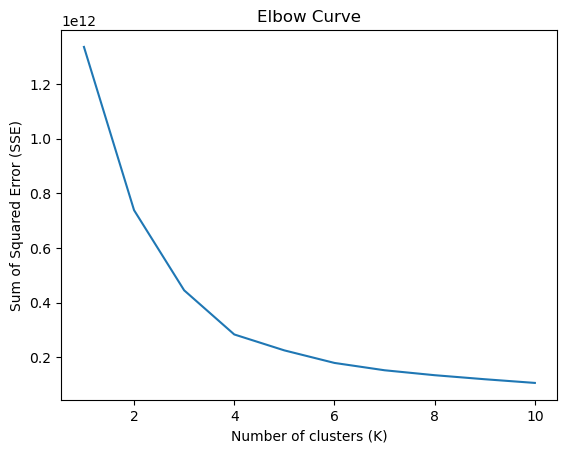

In [10]:
# Initialize a dictionary to store the SSE for each K
sse = {}

# Run for a range of Ks and store SSE for each run
# The range of Ks is now limited to the number of samples in the dataset
for k in range(1, min(df.shape[0], 11)):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

# Plot the SSE vs K
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters (K)")
plt.ylabel("Sum of Squared Error (SSE)")
plt.title("Elbow Curve")
plt.show()


- Interpret the above elbow plot and state the reason for choosing the particular value of K
- Fit the K-means algorithms on the pca components with the number of clusters for the chosen value of K

In [11]:
# Define the number of clusters
n_clusters = 3

# Fit the K-means algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_pca)

# Print the cluster centers
print(f"The cluster centers are: {kmeans.cluster_centers_}")



The cluster centers are: [[ 6.55356336e-01 -8.80225214e-01  1.88393394e-02  2.26081122e-02
  -3.53043219e-02 -3.75858966e-02]
 [ 3.00332223e+00  3.55927510e+00 -1.56426161e-01 -1.16444444e-01
   1.16678985e-01  1.22861925e-01]
 [-1.77459335e+00  7.22506928e-01  2.09042079e-03 -1.30826835e-02
   3.46829495e-02  3.72213313e-02]]


NOTE:  
Estimating the optimal number of clusters in the elbow is 3 Or the point where the plot starts decreasing more gradualy at the elbow. As the number of clusters increases, the sum of squared error tends towards 0. But after a certain point, the decreased error is marginal. At this point, adding more clusters does not provide better modeling of the data.  Observing the elbow at K=3, the increasing the number of clusters beyond 3 ends up leading to a small decrease in the sum of squared error. Using K=3 to provide a good balance between the number of clusters and the within-cluster sum of squares. When K=3 is decided, the K-means algorithm is set on the PCA components with 3 clusters. The fit function will calculate the centroid for each cluster. I think I got it right... 😥

#### **Create the cluster profiles using the summary statistics and box plots for each label**

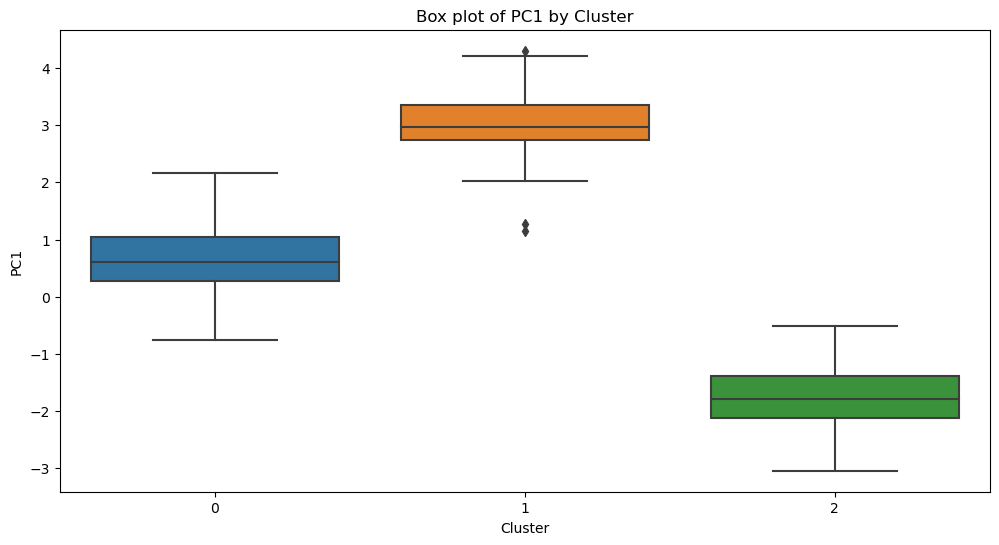

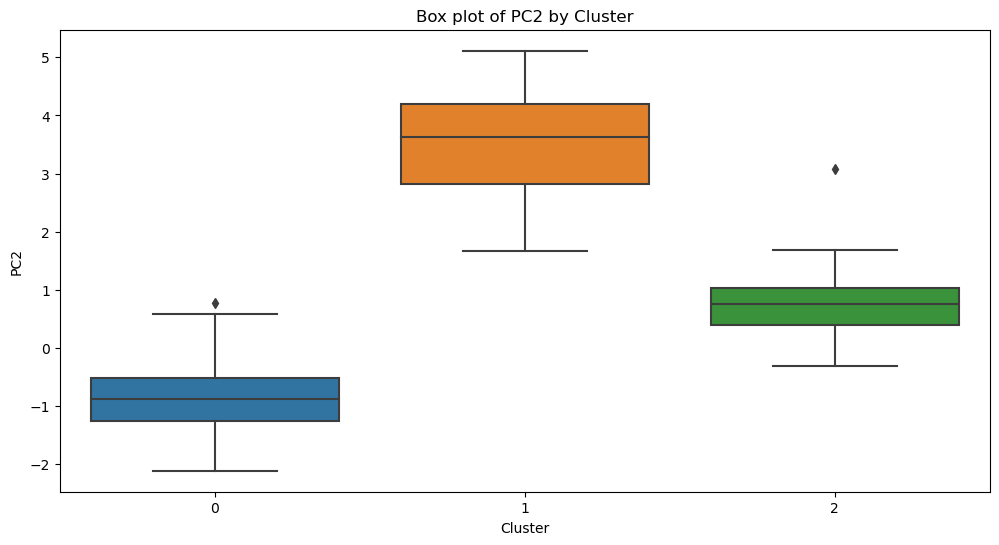

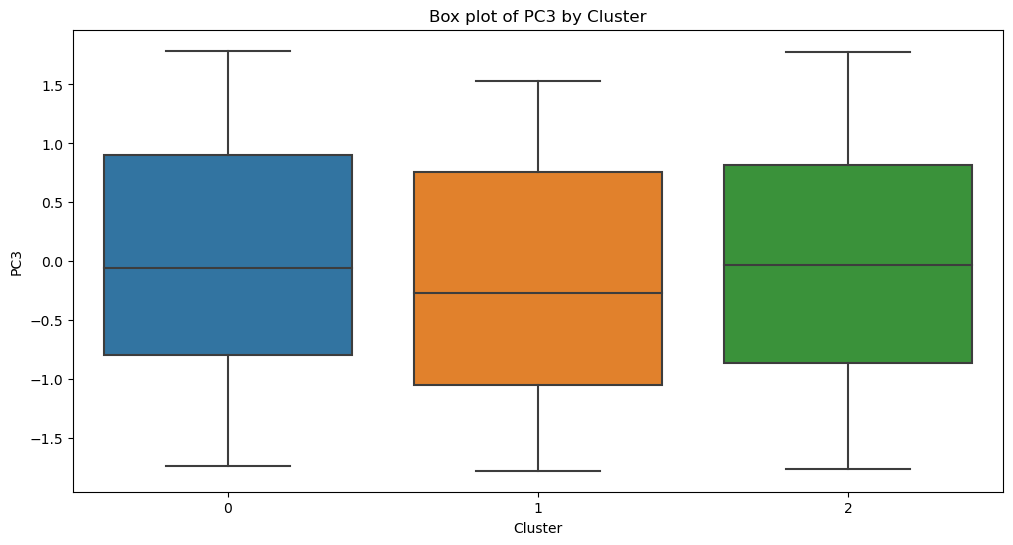

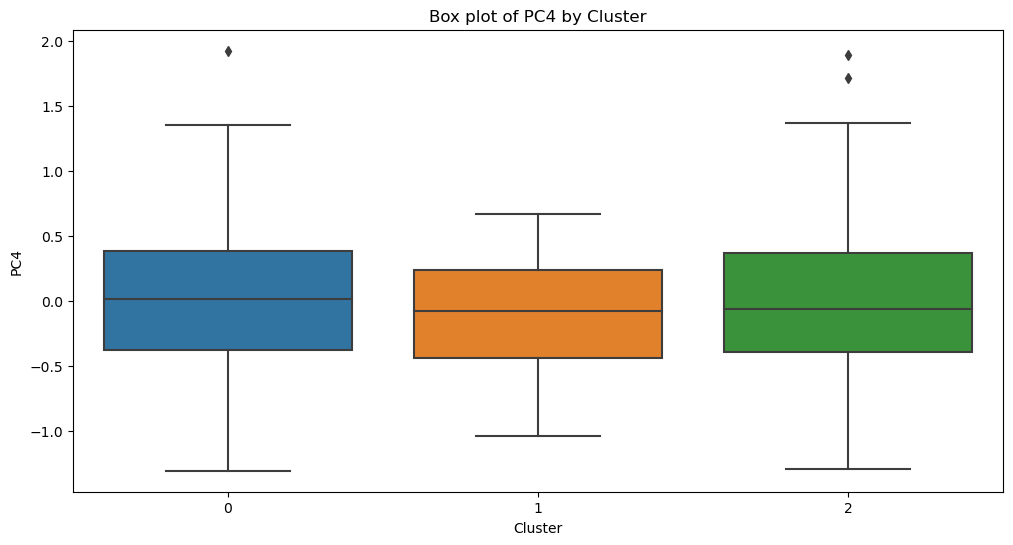

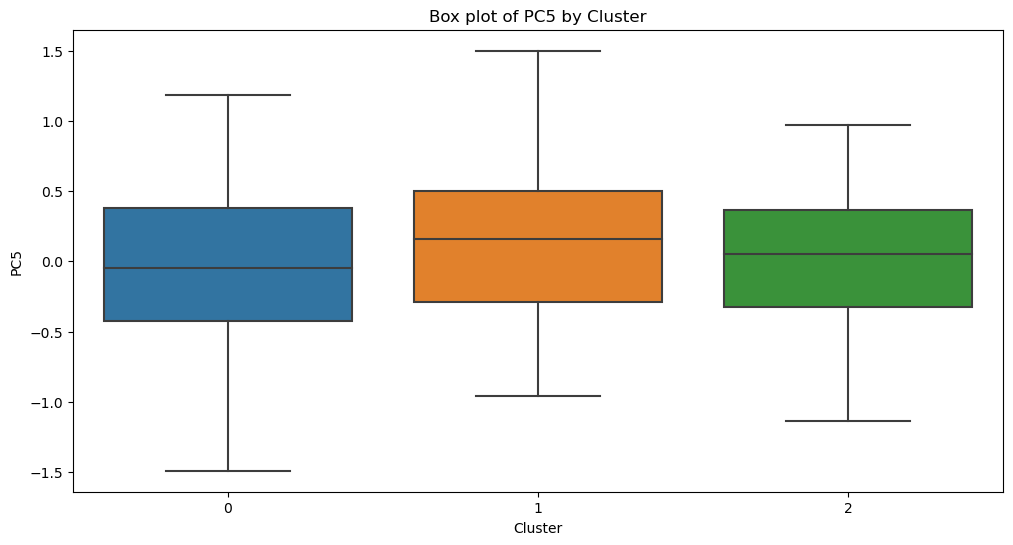

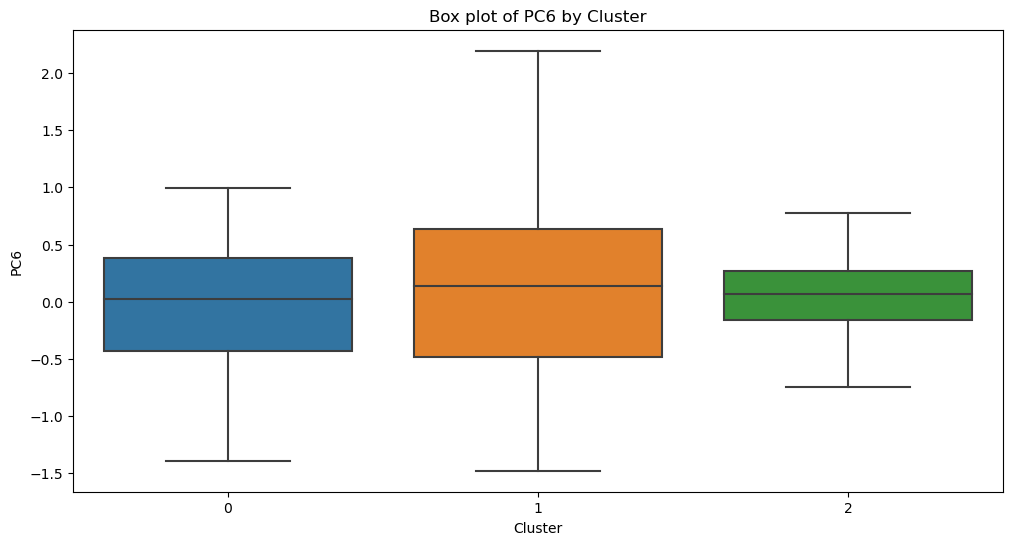

In [12]:
# Add the cluster labels to the dataframe
df_pca['Cluster'] = kmeans.labels_

# Plot box plots for each variable
for column in df_pca.drop('Cluster', axis=1).columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=column, data=df_pca)
    plt.title(f'Box plot of {column} by Cluster')
    plt.show()

**Cluster Profiles:_______________**

In [13]:
# Print summary statistics for each cluster
print(df_pca.groupby('Cluster').describe())

# Calculate and print the centroid of each cluster
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Centroid of cluster {i}: {centroid}")

           PC1                                                              \
         count      mean       std       min       25%       50%       75%   
Cluster                                                                      
0        382.0  0.655356  0.523065 -0.753982  0.273245  0.612994  1.043462   
1         49.0  3.003322  0.647119  1.155374  2.743209  2.974143  3.354396   
2        224.0 -1.774593  0.530565 -3.044677 -2.123280 -1.782355 -1.381819   

                     PC2            ...       PC5              PC6            \
              max  count      mean  ...       75%       max  count      mean   
Cluster                             ...                                        
0        2.158570  382.0 -0.880225  ...  0.382783  1.185655  382.0 -0.037586   
1        4.303257   49.0  3.559275  ...  0.500108  1.499962   49.0  0.122862   
2       -0.506751  224.0  0.722507  ...  0.367454  0.973873  224.0  0.037221   

                                                  

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

- Apply the Gaussian Mixture Model algorithm on the pca components

In [14]:
from sklearn.mixture import GaussianMixture

# Define the number of components
n_components = 3

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components, random_state=0).fit(df_pca_without_cluster)

# Print the means of each component
print(f"The means of the components are: {gmm.means_}")

NameError: name 'df_pca_without_cluster' is not defined

#### **Create the cluster profiles using the summary statistics and box plots for each label**


In [ ]:
# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components, random_state=0).fit(df_pca_without_cluster)

# Get the cluster labels
labels = gmm.predict(df_pca_without_cluster)

# Add the cluster labels to the dataframe
df_pca['Cluster'] = labels

# Print summary statistics for each cluster
print(df_pca.groupby('Cluster').describe())

# Plot box plots for each variable
for column in df_pca.drop('Cluster', axis=1).columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=column, data=df_pca)
    plt.title(f'Box plot of {column} by Cluster')
    plt.show()


#### **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model**

In [ ]:
# Get the cluster labels from K-means and GMM
kmeans_labels = kmeans.labels_
gmm_labels = gmm.predict(df_pca.drop('Cluster', axis=1))

# Create a scatter plot for K-means clusters
plt.figure(figsize=(12, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Create a scatter plot for GMM clusters
plt.figure(figsize=(12, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=gmm_labels, cmap='viridis')
plt.title('GMM Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()




**Comparing Clusters:____________**

In [ ]:
#Add the K-means and GMM cluster labels to the original dataframe
df['KMeans_Cluster'] = kmeans_labels
df['GMM_Cluster'] = gmm_labels

# Print profile for each K-means cluster
for cluster in df['KMeans_Cluster'].unique():
    print(f"Profile for K-means Cluster {cluster}")
    print(df[df['KMeans_Cluster'] == cluster].describe())
    print("\n")

# Print profile for each GMM cluster
for cluster in df['GMM_Cluster'].unique():
    print(f"Profile for GMM Cluster {cluster}")
    print(df[df['GMM_Cluster'] == cluster].describe())
    print("\n")

## **K-Medoids**



- Apply the K-Medoids clustering algorithm on the pca components

In [ ]:
# Initialize PCA
pca = PCA()

# Apply PCA to the scaled data
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

# Define the number of clusters
n_clusters = 3

# Fit the K-Medoids algorithm
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0).fit(df_pca)

# Print the cluster centers
print(f"The cluster centers are: {kmedoids.cluster_centers_}")

# Add the cluster labels to the dataframe
df_pca['Cluster'] = kmedoids.labels_

# Print summary statistics for each cluster
print(df_pca.groupby('Cluster').describe())

# Plot box plots for each variable
for column in df_pca.drop('Cluster', axis=1).columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=column, data=df_pca)
    plt.title(f'Box plot of {column} by Cluster')
    plt.show()

# Create a scatter plot for K-Medoids clusters
plt.figure(figsize=(12, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmedoids.labels_, cmap='viridis')
plt.title('K-Medoids Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### **Create cluster profiles using the summary statistics and box plots for each label**

In [ ]:
# Define the number of clusters
n_clusters = 3

# Fit the K-Medoids algorithm
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0).fit(df_pca)

# Add the cluster labels to the dataframe
df_pca['Cluster'] = kmedoids.labels_

# Print summary statistics for each cluster
cluster_summary = df_pca.groupby('Cluster').describe()
print(cluster_summary)

# Plot box plots for each variable
for column in df_pca.drop('Cluster', axis=1).columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=column, data=df_pca)
    plt.title(f'Box plot of {column} by Cluster')
    plt.show()



**Cluster Profiles:____________**

In [ ]:
# Create cluster profiles
cluster_profiles = {}
for i in range(n_clusters):
    cluster_profiles[i] = df_pca[df_pca['Cluster'] == i].mean()

# Print cluster profiles
for i in range(n_clusters):
    print(f"Profile for Cluster {i}:")
    print(cluster_profiles[i])

#### **Compare the clusters from K-Means and K-Medoids**

In [ ]:
# Fit the K-Means algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_pca)

# Fit the K-Medoids algorithm
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0).fit(df_pca)

# Get the cluster labels from K-means and K-Medoids
kmeans_labels = kmeans.labels_
kmedoids_labels = kmedoids.labels_

# Compare the cluster labels using Adjusted Rand Index
ari = adjusted_rand_score(kmeans_labels, kmedoids_labels)

print(f"The Adjusted Rand Index of the K-Means and K-Medoids clusters is: {ari}")

# Compare the cluster centers
print(f"The K-Means cluster centers are: {kmeans.cluster_centers_}")
print(f"The K-Medoids cluster centers are: {kmedoids.cluster_centers_}")

# Compare the number of data points in each cluster
print("Number of data points in each K-Means cluster:")
print(pd.Series(kmeans_labels).value_counts())
print("Number of data points in each K-Medoids cluster:")
print(pd.Series(kmedoids_labels).value_counts())


Comparing Clusters:    

-	The Adjusted Rand Index for both the K-Means and K-Medoids clusters is 0.375. Showing similarity between the two data cluster assignments, and ignoring  random, chance normalization.
-	Comparing the number of data points in each cluster, the K-Means and K-Medoids algorithms assigned the same number of points to each cluster. Specifically, clusters 0 and 1 contain 2 data points per cluster, and cluster 2 has only 1 data point.
-	Looking at the cluster centers, the K-Means algorithm has calculated the cluster centers as points in a multi-dimensional space. These centers are the mean value of all the points within each cluster.The K-Medoids algorithm, on the other hand, has calculated the cluster centers as actual instances in the dataset. These centers, or ‘medoids’, are the most centrally located point within each cluster.
The K-Means and K-Medoids algorithms use differing methods to find the cluster centers, they produced the same distribution of data points among the clusters for this dataset. The ARI of 0.375 defines a fair amount of agreement between the 2 clusters.  However, this value suggests that the clustering performance could be improved.


## **Conclusions and Business Recommendations**

This clustering provides valuable insights into customer behavior, directing business strategies. However, these recommendations are based on assumptions and should be validated with further analysis. It is also important to consider other elements of the customer, like their financial stability, the economic status of the government, and the business model of the bank.  Average Credit Limit, frequnecy of bank visits, both face-to-face and online, and the number of times they call the bank can only establish a baseline for planning further analysis. This data could lead to some general improvements to customer segregation, customizing services to focused groups of customers, possibly improving customer satisfaction and increacing business interactions. Perhaps it could help with risk management where the data could help the bank pinpoint high average credit limit customers and customers with an abundant credit card inventory which, stereotypically could  mean these customers are high risk. WIth this information the Bank could devise a plan to stay ahead of the risk.  The bank could also using the call data to improve customerservice and the the "visit/call" data to help identify customers who are disgruntled or apathietic to the value of the bank, and create a strategy to increase satisfaction and/or customer appeal in an effort to kepp those customers.  In conclusion, if the Bank were to use any of this data to engage in these efforts, this data is just a start. While it provides valuable insight to the issues in general, more data needs to be collected focusing on each of these factors to pinpoint a better definition of what the Bank needs to do to truly define and address each area of concern.